<a href="https://colab.research.google.com/github/Yurakc/platzi_data/blob/main/Curso%20de%20Fundamentos%20Pr%C3%A1cticos%20de%20Machine%20Learning/9_11_Regresi%C3%B3n_lineal_simple_multiple_con_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso de Fundamentos Prácticos de Machine Learning/salarios.csv')
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [ ]:
dataset.shape

(30, 2)

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

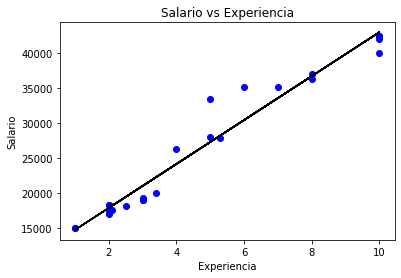

In [ ]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color='blue')
viz_train.plot(X_train, regressor.predict(X_train), color='black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

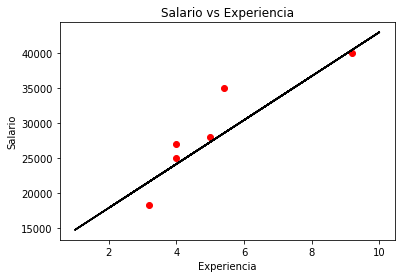

In [ ]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

In [ ]:
regressor.score(X_test,Y_test)

0.7862437374732997

**reto de la clase 11**

In [ ]:
paises = ['CO','MX','BR','AR','PE','US']
column_pais = [paises[np.random.randint(0,len(paises))] for i in range(len(dataset))]
column_pais

['PE',
 'US',
 'US',
 'CO',
 'US',
 'MX',
 'MX',
 'US',
 'CO',
 'US',
 'PE',
 'US',
 'BR',
 'PE',
 'BR',
 'US',
 'PE',
 'AR',
 'CO',
 'CO',
 'BR',
 'PE',
 'PE',
 'US',
 'BR',
 'MX',
 'MX',
 'US',
 'CO',
 'AR']

In [ ]:
dataset['pais'] = column_pais
dataset['cod_pais'] = pd.factorize(dataset['pais'])[0]
dataset

,Aexperiencia,Salario,pais,cod_pais
0,10.0,42500,PE,0
1,8.0,36302,US,1
2,5.4,35000,US,1
3,2.5,18103,CO,2
4,1.0,15000,US,1
5,8.0,37000,MX,3
6,4.0,26300,MX,3
7,6.0,35201,US,1
8,2.0,18302,CO,2
9,10.0,42000,US,1


In [ ]:
x = dataset[['Aexperiencia','cod_pais']]
y = dataset[['Salario']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
regressor.score(X_test,Y_test)

0.8160516756898114

<bound method Figure.show of <Figure size 900x600 with 1 Axes>>

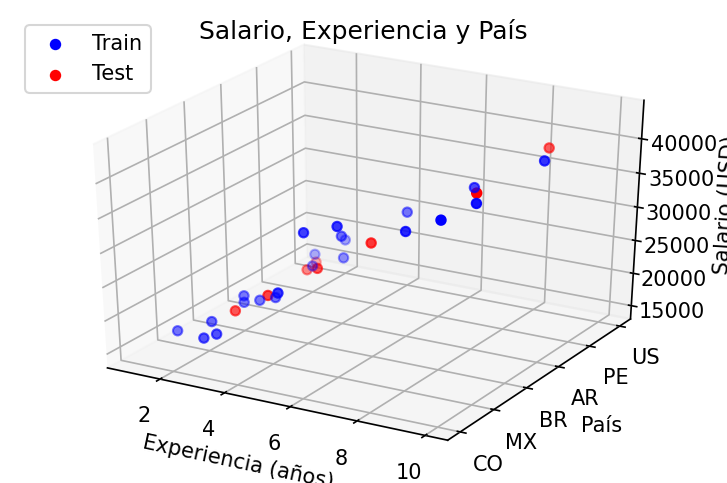

In [ ]:
fig = plt.figure(dpi=150)
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'], X_train['cod_pais'], Y_train, color = 'blue', label = 'Train')
viz_train.scatter(X_test['Aexperiencia'], X_test['cod_pais'], regressor.predict(X_test), color = 'red', label = 'Test')
viz_train.set_title('Salario, Experiencia y País')
viz_train.set_xlabel('Experiencia (años)')
viz_train.set_ylabel('País')
viz_train.set_zlabel('Salario (USD)')
viz_train.set_yticks(range(len(paises)))
viz_train.set_yticklabels(paises)
plt.legend(loc="upper left") 
fig.show